In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\titanic.csv")[['Age','Pclass','Fare','Survived']]
df

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0
...,...,...,...,...
886,27.0,2,13.0000,0
887,19.0,1,30.0000,1
888,NaN,3,23.4500,0
889,26.0,1,30.0000,1


In [3]:
X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived' , axis = 1),df['Survived'],test_size=0.2,random_state=2)

In [4]:
MAX = 0
best_idx = None

for val in range(1, 11):
    
    X_train,X_test,y_train,y_test = train_test_split(df.drop('Survived' , axis = 1),df['Survived'],test_size=0.2,random_state=2)
    rg = LogisticRegression()
    knn = KNNImputer(n_neighbors=val , weights = 'distance')
    X_train_trf = knn.fit_transform(X_train)
    X_test_trf = knn.transform(X_test)
    rg.fit(X_train_trf, y_train)
    y_pred = rg.predict(X_test_trf)
    score = accuracy_score(y_pred, y_test)
    if (score > MAX):
        MAX = score
        best_idx = val

print(f'MAX SCORE IS: {MAX} AND INDEX IS {best_idx}')


MAX SCORE IS: 0.7150837988826816 AND INDEX IS 2


In [5]:
knn = KNNImputer(n_neighbors=2 , weights='distance')
clf = LogisticRegression()
X_train_trf1 = knn.fit_transform(X_train)
X_test_trf1 = knn.transform(X_test)
clf.fit(X_train_trf1 , y_train)
y_pred = clf.predict(X_test_trf1)
print(accuracy_score(y_pred , y_test))

0.7150837988826816


In [6]:
# Comparison with simple imputer

si = SimpleImputer()
clf = LogisticRegression()
X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)
clf.fit(X_train_trf2 , y_train)
y_pred = clf.predict(X_test_trf2)
print(accuracy_score(y_pred , y_test))

0.6927374301675978


In [13]:
X_train_trf1 = pd.DataFrame(X_train_trf1 , columns = X_train.columns)
X_train_trf2 = pd.DataFrame(X_train_trf2 , columns = X_train.columns)
X_train_trf3 = pd.DataFrame(X_train_trf3 , columns = X_train.columns)

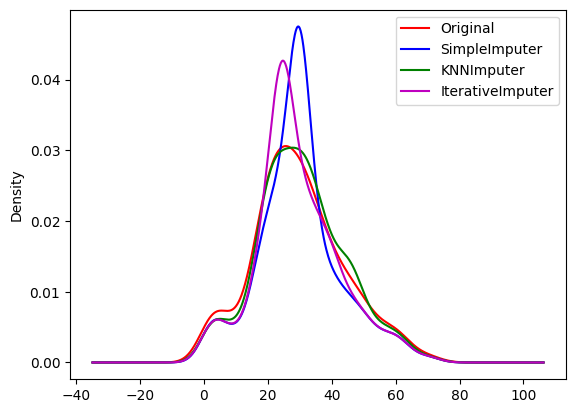

In [15]:
X_train['Age'].plot(kind = 'kde' , c = 'r' , label = 'Original')
X_train_trf2['Age'].plot(kind = 'kde' , c = 'b' , label = 'SimpleImputer')
X_train_trf1['Age'].plot(kind = 'kde' , c = 'g' , label = 'KNNImputer')
X_train_trf3['Age'].plot(kind = 'kde' , c = 'm' , label = 'IterativeImputer')
plt.legend()
plt.show()


In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [12]:
it = IterativeImputer(max_iter=20 , random_state=2)
clf = LogisticRegression()
X_train_trf3 = it.fit_transform(X_train)
X_test_trf3 = it.transform(X_test)
clf.fit(X_train_trf3 , y_train)
y_pred = clf.predict(X_test_trf3)
print(accuracy_score(y_pred , y_test))

0.6927374301675978
